In [1]:
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from keras.datasets import mnist
from time import time
import numpy as np
from sklearn.model_selection import GridSearchCV
import tensorflow as tf
from tensorflow.keras.layers import Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
print(tf.__version__)

Using TensorFlow backend.


2.0.0-rc1


In [2]:
train = pd.read_csv("/home/himalaya/Desktop/kaggle-competition-master/digit-recognizer/train.csv")
print(train.shape)

(42000, 785)


In [3]:
y_train = train["label"]
X_train = train.drop(labels=["label"],axis=1)


 	 # y_train value counts # 
 1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64


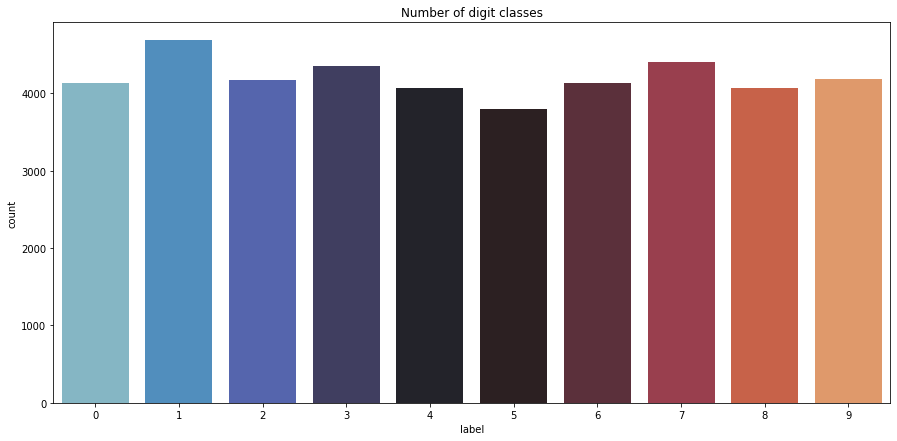

In [4]:
plt.figure(figsize=(15,7))
g = sns.countplot(y_train, palette="icefire")
plt.title("Number of digit classes")
print(" \t # y_train value counts # \n",y_train.value_counts())

In [7]:
X_train = X_train.values.reshape(-1,28,28,1)

<class 'numpy.ndarray'>
[[[  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]]

 [[  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]]

 [[  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]]

 [[  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]]

 [[  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]


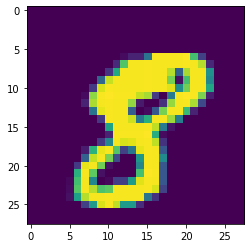

In [8]:
print(type(X_train))

import numpy as np
np.set_printoptions(linewidth=200)
import matplotlib.pyplot as plt
plt.imshow(X_train[10])
print(X_train[10])
print(y_train[10])

In [8]:
X_train = X_train / 255.0
# X_test = X_test / 255.0

In [10]:
# X_test = X_test.values.reshape(-1,28,28,1)
X_train = X_train.values.reshape(-1,28,28,1)

In [7]:
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
Y_train = to_categorical(y_train, num_classes = 10)

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=2)
print("x_train shape",X_train.shape)
print("x_val shape",X_val.shape)
print("y_train shape",Y_train.shape)
print("y_val shape",Y_val.shape)

x_train shape (37800, 28, 28, 1)
x_val shape (4200, 28, 28, 1)
y_train shape (37800, 10)
y_val shape (4200, 10)


In [11]:
model = tf.keras.Sequential([

        # input layer
        tf.keras.layers.Conv2D(8,(5,5),activation = 'relu',input_shape=(28,28,1)),
        tf.keras.layers.MaxPooling2D(2,2),
        Dropout(0.25),

        # 1st dense layer
        tf.keras.layers.Conv2D(16,(3,3),padding = 'Same',activation = 'relu'),
        tf.keras.layers.MaxPooling2D((2,2),strides=(2,2)),
        Dropout(0.25),
        # Flatten layer
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(256, activation='relu'),
        Dropout(0.5),
        # output layer
        tf.keras.layers.Dense(10, activation='softmax')
    ])

In [14]:
optimiser = tf.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999)
model.compile(optimizer=optimiser,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

model.summary()
# optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 8)         208       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 8)         0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 12, 12, 16)        1168      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 16)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 6, 6, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 576)               0

In [15]:
# optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)

In [16]:
# model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [17]:
epochs = 100  
batch_size = 250

In [20]:
datagen = ImageDataGenerator(
        featurewise_center=False,  
        samplewise_center=False, 
        featurewise_std_normalization=False,  
        samplewise_std_normalization=False,  
        zca_whitening=False, 
        rotation_range=5,  
        zoom_range = 0.1, 
        width_shift_range=0.1,  
        height_shift_range=0.1,  
        horizontal_flip=False,  
        vertical_flip=False)  

datagen.fit(X_train)

In [21]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=6)

In [22]:
history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val), steps_per_epoch=X_train.shape[0] // batch_size,
                              callbacks=[early_stopping])

Epoch 1/100
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
151/151 [==============================] - 19s 125ms/step - loss: 2.1323 - accuracy: 0.2555 - val_loss: 1.5334 - val_accuracy: 0.6993
Epoch 2/100
151/151 [==============================] - 19s 127ms/step - loss: 1.5109 - accuracy: 0.5025 - val_loss: 0.7752 - val_accuracy: 0.8100
Epoch 3/100
151/151 [==============================] - 19s 124ms/step - loss: 1.1722 - accuracy: 0.6129 - val_loss: 0.5429 - val_accuracy: 0.8688
Epoch 4/100
151/151 [==============================] - 19s 123ms/step - loss: 0.9648 - accuracy: 0.6842 - val_loss: 0.4053 - val_accuracy: 0.9036
Epoch 5/100
151/151 [==============================] - 19s 126ms/step - loss: 0.8100 - accuracy: 0.7373 - val_loss: 0.3168 - val_accuracy: 0.9269
Epoch 6/100
151/151 [==============================] - 19s 126ms/step - loss: 0.7095 - accuracy: 0.7724 - val_loss: 0.2725 - val_accuracy: 0.9345
Epoch 7/100
151/151 [=========

In [23]:
print("Accuracy of the model is --> " , model.evaluate(X_val, Y_val, batch_size=batch_size)[1]*100 , "%")
print("Loss of the model is --> " , model.evaluate(X_val, Y_val, batch_size=batch_size)[0])

4200/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Accuracy of the model is -->  98.54761958122253 %
4200/1 [==============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Loss of the model is -->  0.04614370826276995


In [24]:
accuracy=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(accuracy)) 

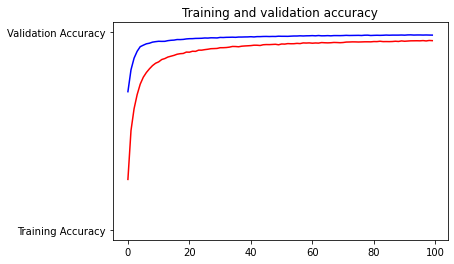

<Figure size 432x288 with 0 Axes>

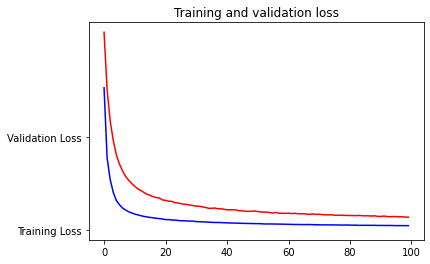

In [25]:
plt.plot(epochs, accuracy, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()
plt.show()
#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")


plt.title('Training and validation loss')
plt.show()

In [ ]:
test = pd.read_csv("/kaggle/input/digit-recognizer/test.csv")
print(test.shape)

In [ ]:
X_test = test / 255.0
X_test = X_test.values.reshape(-1,28,28,1)

In [27]:
y_predicted = model.predict(X_test)

In [28]:
y_predicted.shape

(4200, 10)

In [29]:
labels = np.argmax(labels, axis=1)

In [30]:
labels.shape

(4200,)

In [ ]:
sample_submission = pd.read_csv("../input/digit-recognizer/sample_submission.csv")